<a href="https://colab.research.google.com/github/mgmills93/AEM_Spring_2019/blob/master/Take_Home_Assignment_3_Mary_Mills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## THA3: Research Question and Dataset
---


The simple research question I will seek to answer is:** Did border states deport more individuals through the Secure Communities program than non-border states during the period 2014-2017? **

Secondly, as a follow-up question, I will also seek to answer:** Do the levels of Secure Communities arrests during this period correlate at all to a state's Hispanic population?**

The data I will use comes from two separate sources. The** first source** is a dataset that lists individual-level Secure Communities arrests from 2014 through 2017. I found this data through ICE's FOIA library, available here: https://www.ice.gov/foia/library

This set contains many individual details about the Secure Communities deportees (port of exit, sex, country of origin, etc.) but for now the main data point I want is the number of arrests per state. 

The **second and third datasets** I will use are ones that I created through The U.S. Census website's American Fact Finder Tool. I filtered 2016's population data by total population, and then hispanic origin data by state as well, and collapsed all specific ethnicity data to obtain the overall percentage of that state's residents who were of Hispanic origin in 2016. I chose 2016 in the hopes that these figures would be a relative median between 2015 and 2017's numbers. 



### Secure Communities Data: Collapsing Arrest_Number and Creating Border Column
---

Below I will sum each state's arrests from the Secure Communities dataset, and create a new column to identify which states lie on the Mexico and Canada borders. I excluded all states from this list that have only a water border with either country (ex. Michigan). 


In [0]:
import pandas as pd
import numpy as np
# border_states lists the U.S. states that share a border with either Canada or Mexico, excluding states with a water border only
border_states = ['TX', 'AZ', 'NM', 'CA', 'AK', 'ME', 'NH', 'VT', 'MI', 'MN', 'ND', 'MT', 'ID', 'WA', 'NY']
sc_arrests = pd.read_excel('https://raw.githubusercontent.com/mgmills93/AEM_Spring_2019/master/enforcement/Secure_Communities_2017_Deportations.xlsx', header=4)
# I will sum and group the arrest observations by state
sum_arrests = sc_arrests.groupby('State').size().to_frame('Arrest_Number').reset_index()
# Creating the Border column will identify whether a state is in the border_states list created above
sum_arrests['Border'] = ['Y' if x in border_states else 'N' for x in sum_arrests['State']]
print(sum_arrests.sample(5))


   State  Arrest_Number Border
21    MD            867      N
28    MT             30      Y
46    TX          54588      Y
53    WV            259      N
49    VI              3      N


###Census Data: Cleaning Total & Hispanic Origin Population Data and Preparing for Merge
---
Next I will clean the Census datasets in preparation to merge them into my existing dataset by State.


The dictionary that I used to convert all the state names to their respective two-letter codes I found on GitHub here: https://gist.github.com/rogerallen/1583593#file-us_state_abbrev-py


In [0]:
import pandas as pd
import numpy as np
total_pop = pd.read_csv('https://raw.githubusercontent.com/mgmills93/AEM_Spring_2019/master/demographics/ACS_2016_Total_Pop_copy.csv', header=1)
print(total_pop.sample(5))
total_pop.drop(total_pop.columns[[0, 1, 4]], axis=1, inplace=True)
# I will rename the columns for geography and total population
total_pop.rename(columns={'Geography':'State', 'Estimate; Total':'Total_Population'}, inplace=True)
print(total_pop.sample(5))
# Now I will convert the state names to the two-letter abbreviations to match my other dataset
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Colmbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',}

total_pop['State']=total_pop['State'].map(us_state_abbrev)
print(total_pop.sample(5))


             Id   Id2    Geography  Estimate; Total Margin of Error; Total
51  0400000US56  56.0      Wyoming           583029                  *****
21  0400000US24  24.0     Maryland          5959902                  *****
2   0400000US02   2.0       Alaska           736855                  *****
17  0400000US20  20.0       Kansas          2898292                  *****
25  0400000US28  28.0  Mississippi          2989192                  *****
             State  Total_Population
34  North Carolina           9940828
19       Louisiana           4645670
2           Alaska            736855
35    North Dakota            736162
36            Ohio          11586941
   State  Total_Population
14    IL          12851684
40    RI           1054491
33    NY          19697457
28    NE           1881259
35    ND            736162


###Hispanic Origin Dataset

The dataset I obtained from Fact Finder did not include Hispanic Origin data for 7 states: Alaska, Montana, North Dakota, South Dakota, Vermont, West Virginia, and Wyoming. I searched elsewhere on the Census website to obtain these numbers, and found them through the Census' QuickFacts page: https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml?src=bkmk

I will insert these population figures individually below.

In [0]:
import pandas as pd
import numpy as np
hisp_total = pd.read_csv('https://raw.githubusercontent.com/mgmills93/AEM_Spring_2019/master/demographics/ACS_2016_Hisp_Pop_copy.csv', header=1)
hisp_total.drop(hisp_total.columns[[0, 1, 3, 4, 5, 6, 8]], axis=1, inplace=True)
# I will now add the missing states
missing_states = [pd.Series(['Alaska', 50162], index=hisp_total.columns) ,
                  pd.Series(['Montana', 36626], index=hisp_total.columns) ,
                  pd.Series(['North Dakota', 24744], index=hisp_total.columns), 
                  pd.Series(['South Dakota', 29901], index=hisp_total.columns), 
                  pd.Series(['Vermont', 11183], index=hisp_total.columns), 
                  pd.Series(['West Virginia', 27021], index=hisp_total.columns), 
                  pd.Series(['Wyoming', 56681], index=hisp_total.columns),
                  pd.Series(['Nebraska', 167405], index=hisp_total.columns)]
comp_hisp_total = hisp_total.append(missing_states, ignore_index=True)
# I want to rename the columns for geography and total population
comp_hisp_total.rename(columns={'Estimate; Total: - Hispanic or Latino:':'Hispanic_Population', 'Geography':'State'}, inplace=True)
print(comp_hisp_total.tail(5))
# I will now convert the state names to their respective two-letter codes
comp_hisp_total['State']=comp_hisp_total['State'].map(us_state_abbrev)
print(comp_hisp_total.sample(5))

            State  Hispanic_Population
48   South Dakota                29901
49        Vermont                11183
50  West Virginia                27021
51        Wyoming                56681
52       Nebraska               167405
   State  Hispanic_Population
51    WY                56681
18    ME                20714
5     CT               562347
22    MN               288460
21    MI               491430


###Merging the Three Sets and Creating %Hispanic Column
---
Now I will merge these three datasets by state.
I can validate that no states were dropped because there are 50 rows. There were no Secure Communities arrests in Nebraska reported during this time, and this set includes Puerto Rico (50 states - Nebraska + Puerto Rico)=50.

In [0]:
pop_th3set = sum_arrests.merge(total_pop, on='State', how='inner')
final_th3set = pop_th3set.merge(comp_hisp_total, on='State', how='inner')
# I will now create a column %Hispanic by dividing Total 2016 Population by 2016 Hispanic Population
final_th3set['Percent_Hispanic'] = final_th3set['Hispanic_Population']/final_th3set['Total_Population']*100
final_th3set.sort_values('State')
print(final_th3set.head())

  State  Arrest_Number Border  Total_Population  Hispanic_Population  \
0    AK             10      Y            736855                50162   
1    AL           1173      N           4841164               199686   
2    AR            859      N           2968472               214544   
3    AZ          10568      Y           6728577              2144775   
4    CA          24843      Y          38654206             15280776   

   Percent_Hispanic  
0          6.807581  
1          4.124752  
2          7.227422  
3         31.875611  
4         39.531988  


###Analysis: Do Border States Have More Secure Communities Arrests?
---
Now that I have compiled my dataset, I will start by answering my first question of whether border or non-border states had more Secure Communities arrests. To do this, I will first find the total number of arrests for the two groups. Then I will find the means of both groups. 

In [0]:
# total SC arrests
final_th3set.groupby('Border').sum()


,Arrest_Number,Total_Population,Hispanic_Population,Percent_Hispanic
Border,,,,
N,46298,195578755,25330750,441.161667
Y,102477,123968524,35150609,235.686889


In [0]:
#mean of each group
final_th3set.groupby('Border').mean()

,Arrest_Number,Total_Population,Hispanic_Population,Percent_Hispanic
Border,,,,
N,1322.8,5.587964e+06,7.237357e+05,12.604619
Y,6831.8,8.264568e+06,2.343374e+06,15.712459


Obviously, the border states had higher levels of Secure Communities arrests during this period both on average and overall. 


### Analysis: Are Secure Communities Arrests and Hispanic Population Correlated?
---
To determine whether there is a correlation between the proportion of a state's population that is hispanic and the number of arrests through the Secure Communities program, I will first plot the data to see if there appears to be a linear relationship. 

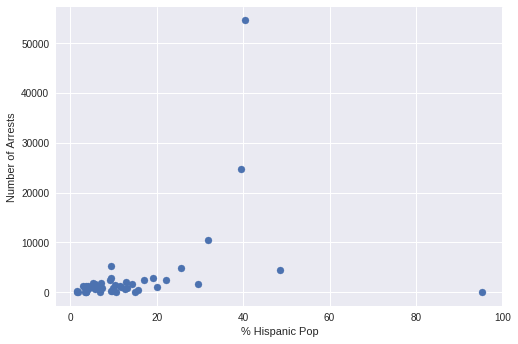

In [0]:
import matplotlib.pyplot as plt
plt.xlabel('% Hispanic Pop')
plt.ylabel('Number of Arrests')
plt.scatter(final_th3set.Percent_Hispanic, final_th3set.Arrest_Number)

Next, I will use scipy.stats.pearsonr to check the Pearson correlation coefficient and p-value for this data to see if there is indeed a correlation. 

In [0]:
from scipy.stats import pearsonr
data1 = final_th3set['Percent_Hispanic']
data2 = final_th3set['Arrest_Number']
pearsonr(data1, data2)

(0.369919233703258, 0.008191259243219744)

I plan on expanding my sample of states by year (50 states x year) to make this analysis more robust.